# Курс «Введение в нейронные сети»

## Урок 2. Keras

### Домашняя работа к уроку 2

#### Задание 1

Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
import numpy as np
import keras
from mnist import MNIST
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Загрузили данные

In [2]:
mndata = MNIST('lesson_source')
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

Нормализуем данные.

In [3]:
train_images = (np.array(train_images) / 255) - 0.5
test_images = (np.array(test_images) / 255) - 0.5

Преобразуем данные из матричного вида в векторный.

In [4]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

Формируем модель (Здесь можно "поиграться" количеством слоев, количеством нейронов в слое, видом функции активации)

In [5]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

Компилируем модель

In [6]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

Обучаем модель (здесь можно поиграться количеством эпох и количеством образцов на эпоху)

In [7]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3601 - accuracy: 0.8917
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1819 - accuracy: 0.9449
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1379 - accuracy: 0.9576
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1163 - accuracy: 0.9635
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1037 - accuracy: 0.9677


Оценка модели

In [8]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.1085 - accuracy: 0.9652


[0.10850922763347626, 0.9652000069618225]

Сохраняем модель

In [9]:
model.save_weights('model.h5')

Загружаем модель

In [10]:
# model.load_weights('model.h5')

Предсказываем на тестовом наборе

In [11]:
predictions = model.predict(test_images[:5])

Вывод результата предсказания

In [12]:
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
array('B', [7, 2, 1, 0, 4])


Поэкспериментируем с различными параметрами

Посмотрим как влияет тип функции активации на последний слой
relu
sigmoid
softmax
softplus
softsign
tanh
selu
elu
exponential

In [13]:
activations = ['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential']
accuracy = [0] * len(activations)
losses = [0] * len(activations)

In [14]:
for i in range(len(activations)):
    for j in range(10):
        
        model = Sequential([
            Dense(64, activation='relu', input_shape=(784,)), 
            Dense(64, activation='relu'), 
            Dense(10, activation=activations[i])]
        )
        
        model.compile(
            optimizer='adam', 
            loss='categorical_crossentropy', 
            metrics=['accuracy']
        )
        
        model.fit(
            train_images, 
            to_categorical(train_labels), 
            epochs=5, 
            batch_size=32,
            verbose=0
        )
        
        result = model.evaluate(test_images, to_categorical(test_labels))
        losses[i] += result[0]
        accuracy[i] += result[1]

    losses[i] = losses[i] / 10
    accuracy[i] = accuracy[i] / 10
    
    print(activations[i], ': loss - ', losses[i], ', accuracy: ', accuracy[i])

313/313 [==============================] - 0s 1ms/step - loss: 7.3322 - accuracy: 0.2723
relu : loss -  3.734466326236725 , accuracy:  0.5104099959135056
313/313 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.9579
sigmoid : loss -  0.12430593222379685 , accuracy:  0.9619100034236908
313/313 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9643
softmax : loss -  0.11566095054149628 , accuracy:  0.9635299980640412
313/313 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9637
softplus : loss -  0.11864565461874008 , accuracy:  0.9631799995899201
313/313 [==============================] - 0s 1ms/step - loss: 8.1509 - accuracy: 0.1125
softsign : loss -  8.248599338531495 , accuracy:  0.10330000072717667
313/313 [==============================] - 0s 1ms/step - loss: 8.1203 - accuracy: 0.1010
tanh : loss -  8.0748441696167 , accuracy:  0.10401000156998634
313/313 [==============================] - 0s 1ms/step -

313/313 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9596
exponential : loss -  0.12047663256525994 , accuracy:  0.9629999876022339


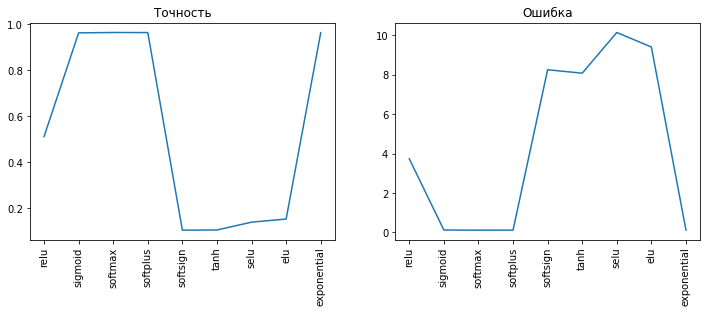

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(activations, accuracy)
plt.title('Точность')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.plot(activations, losses)
plt.title('Ошибка')
plt.xticks(rotation=90)

plt.show()

In [16]:
print(f'Лучшая модель по точности: {activations[accuracy.index(max(accuracy))]}')
print(f'Лучшая модель по ошибке: {activations[losses.index(min(losses))]}')

Лучшая модель по точности: softmax
Лучшая модель по ошибке: softmax


Очевидно для данного набора данных наиболее лучшая функция активации, это "softplus". Ее и будем использовать в дальнейшем.

Посмотрим как на точность влияет количество слоев.

In [17]:
losses = [0] * 10
accuracy = [0] * 10

In [18]:
for i in range(10):
    # Формируем массив промежуточных слоев.
    laers =[Dense(64, activation='relu', input_shape=(784,))]
    for j in range(i):
        laers.append(Dense(64, activation='relu'))
    laers.append(Dense(10, activation='softplus'))
    model = Sequential(laers)

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )

    model.fit(
        train_images, 
        to_categorical(train_labels), 
        epochs=5, 
        batch_size=32,
        verbose=0
    )

    result = model.evaluate(test_images, to_categorical(test_labels))
    losses[i] = result[0]
    accuracy[i] = result[1]
    
    print(i, ': loss - ', losses[i], ', accuracy: ', accuracy[i])

313/313 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.9630
0 : loss -  0.12330599129199982 , accuracy:  0.9629999995231628
313/313 [==============================] - 0s 1ms/step - loss: 0.1342 - accuracy: 0.9602
1 : loss -  0.1342257261276245 , accuracy:  0.9602000117301941
313/313 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9703
2 : loss -  0.10165964066982269 , accuracy:  0.970300018787384
313/313 [==============================] - 0s 1ms/step - loss: 0.1193 - accuracy: 0.9648
3 : loss -  0.11925516277551651 , accuracy:  0.9648000001907349
313/313 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9600
4 : loss -  0.12813909351825714 , accuracy:  0.9599999785423279
313/313 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.9613
5 : loss -  0.1290517896413803 , accuracy:  0.9613000154495239
313/313 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.9

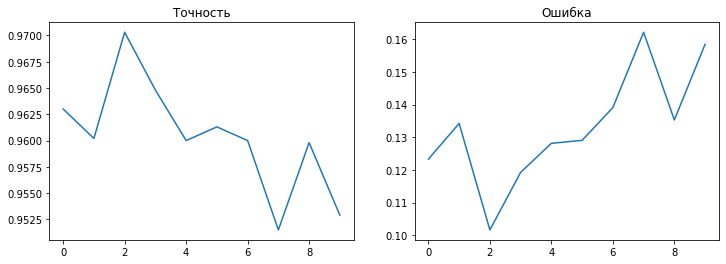

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy)
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Ошибка')

plt.show()

При 1 скрытом слое точность максимальна и ошибка минимальна.

Посмотрим количество нейронов в скрытом слое.

In [20]:
losses = [0] * 40
accuracy = [0] * 40

In [21]:
for i in range(40):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)), 
        Dense(i + 1, activation='relu'), 
        Dense(10, activation='softplus')]
    )

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )

    model.fit(
        train_images, 
        to_categorical(train_labels), 
        epochs=5, 
        batch_size=32,
        verbose=0
    )

    result = model.evaluate(test_images, to_categorical(test_labels))
    losses[i - 1] = result[0]
    accuracy[i - 1] = result[1]
    
    print(i + 1, ' нейронов: loss - ', result[0], ', accuracy: ', result[1])

313/313 [==============================] - 0s 1ms/step - loss: 1.4644 - accuracy: 0.4632
1  нейронов: loss -  1.4643856287002563 , accuracy:  0.46320000290870667
313/313 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - accuracy: 0.0980
2  нейронов: loss -  1.1920930376163597e-07 , accuracy:  0.09799999743700027
313/313 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.9093
3  нейронов: loss -  0.35193994641304016 , accuracy:  0.9093000292778015
313/313 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.9158
4  нейронов: loss -  0.3282511830329895 , accuracy:  0.9157999753952026
313/313 [==============================] - 0s 1ms/step - loss: 0.2607 - accuracy: 0.9305
5  нейронов: loss -  0.2607095241546631 , accuracy:  0.9304999709129333
313/313 [==============================] - 0s 1ms/step - loss: 0.1881 - accuracy: 0.9440
6  нейронов: loss -  0.18814465403556824 , accuracy:  0.9440000057220459
313/313 [=============

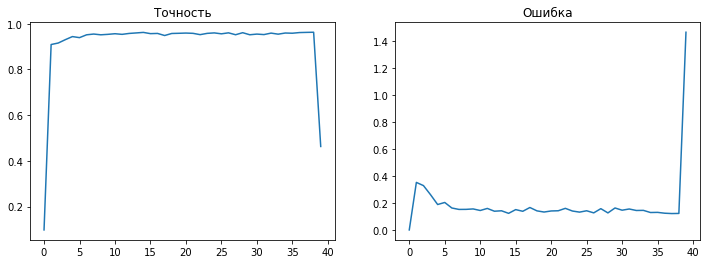

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy)
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Ошибка')

plt.show()

In [23]:
print(f'Оптимальное количество нейронов в слое по точности: {accuracy.index(max(accuracy))}')
print(f'Оптимальное количество нейронов в слое по ошибке: {losses.index(min(losses))}')

Оптимальное количество нейронов в слое по точности: 38
Оптимальное количество нейронов в слое по ошибке: 0


Для уверенного обучения нейронной сети достаточно 6-8 нейронов в скрытом слое, то, что сверху не ведет к существенному величению точности и колебается в пределах 1%, но в тоже время увеличивает время обучения.

Для надежности будем использовать 8 нейронов на слой.

Посмотрим как влияет на обучение количество эпох

In [24]:
losses = [0] * 40
accuracy = [0] * 40

In [25]:
for i in range(40):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)), 
        Dense(8, activation='relu'), 
        Dense(10, activation='softplus')]
    )

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )

    model.fit(
        train_images, 
        to_categorical(train_labels), 
        epochs=i + 1, 
        verbose=0
    )

    result = model.evaluate(test_images, to_categorical(test_labels))
    losses[i] = result[0]
    accuracy[i] = result[1]
    
    print(i + 1, ' эпох: loss - ', result[0], ', accuracy: ', result[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.3092 - accuracy: 0.9139
1  эпох: loss -  0.30920401215553284 , accuracy:  0.9139000177383423
313/313 [==============================] - 0s 1ms/step - loss: 0.2293 - accuracy: 0.9317
2  эпох: loss -  0.22932471334934235 , accuracy:  0.9316999912261963
313/313 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.9288
3  эпох: loss -  0.26516851782798767 , accuracy:  0.9287999868392944
313/313 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.9445
4  эпох: loss -  0.18839679658412933 , accuracy:  0.9445000290870667
313/313 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.9514
5  эпох: loss -  0.15445832908153534 , accuracy:  0.9513999819755554
313/313 [==============================] - 0s 1ms/step - loss: 0.1639 - accuracy: 0.9485
6  эпох: loss -  0.16389816999435425 , accuracy:  0.9484999775886536
313/313 [==============================] - 0s 1ms/st

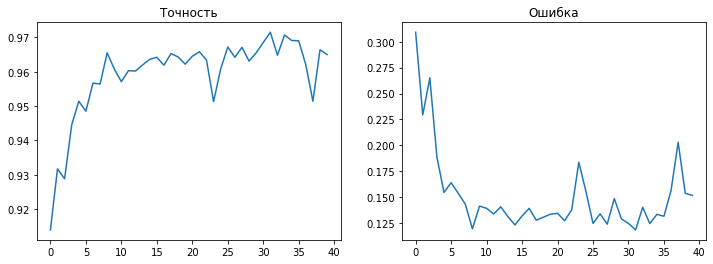

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy)
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Ошибка')

plt.show()

Для уверенного обучения достаточно 10 - 15 эпох.

Наиболее оптимальные параметры для орбучения нейросети:
    функция активации - softmax
    количество скрытых слоев - 1
    количество нейронов в скрытом слое - 8
    количество эпох для обучения - 10

In [27]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)), 
    Dense(8, activation='relu'), 
    Dense(10, activation='softplus')]
)

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.fit(
    train_images, 
    to_categorical(train_labels), 
    epochs=10
)

model.evaluate(test_images, to_categorical(test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5657 - accuracy: 0.8332
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2446 - accuracy: 0.9292
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1968 - accuracy: 0.9421
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1708 - accuracy: 0.9497
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1527 - accuracy: 0.9549
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1385 - accuracy: 0.9583
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1252 - accuracy: 0.9625
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1183 - accuracy: 0.9649
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1095 - accuracy: 0.9665
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.1351 

[0.13509778678417206, 0.9593999981880188]

#### Задание 2

Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

**summary** вывод сводки по модели

In [28]:
model.summary()

Model: "sequential_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_578 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_579 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_580 (Dense)            (None, 10)                90        
Total params: 50,850
Trainable params: 50,850
Non-trainable params: 0
_________________________________________________________________


**get_layer** возвращает экземпляр слоя по его имени или индексу.

In [29]:
model.get_layer(index=1)

**add** добавить новый слой в модель.

In [30]:
model.add(Dense(64, activation='relu'))

**pop** удалить последний слой из модели.

In [31]:
model.pop()

**get_weights** получить весовые коэффициенты

In [32]:
model.get_weights()

[array([[ 0.01535766, -0.05362821, -0.07350215, ...,  0.08297878,
          0.0024549 ,  0.0211814 ],
        [ 0.01145383,  0.09414326, -0.01113774, ..., -0.02361814,
         -0.03060312,  0.03311445],
        [-0.01848993,  0.02118951,  0.08999184, ..., -0.0590318 ,
          0.01230162, -0.04498774],
        ...,
        [ 0.03792409, -0.02995893,  0.04283123, ...,  0.06367004,
         -0.01523761,  0.08683975],
        [-0.05242844,  0.06762982, -0.01129801, ..., -0.04937489,
         -0.06714551,  0.07523024],
        [-0.02343112,  0.05809185,  0.05864968, ..., -0.06729016,
          0.04551638,  0.07747985]], dtype=float32),
 array([ 0.03776954, -0.01851614, -0.00921838,  0.03563455, -0.03719127,
        -0.02511976, -0.04495522, -0.02377732, -0.00899107, -0.03054524,
        -0.00581639, -0.00600249, -0.02775132, -0.00803045,  0.02657246,
        -0.00468317, -0.05541725, -0.00474706, -0.03581348, -0.00510791,
        -0.02130857,  0.04033734, -0.01542209, -0.0099964 , -0.006

**set_weights** задать весовые коэффициенты

In [33]:
weights = model.get_weights()
model.set_weights(weights)

**get_config** возвращает настройки слоев.

In [34]:
model.get_config()

{'name': 'sequential_181',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_578_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_578',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_579',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
 

**from_config** задает настройки слоев.

In [35]:
config = model.get_config()
model.from_config(config)

**to_json** возвращает строку JSON, содержащую настройки слоев.

In [36]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_181", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_578_input"}}, {"class_name": "Dense", "config": {"name": "dense_578", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_579", "trainable": true, "dtype": "float32", "units": 8, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularize

**model_from_json** возвращает модель из строки JSON.

In [37]:
config = model.to_json()
loaded_model = keras.models.model_from_json(config)

**clone_model** клонирует модель

In [38]:
keras.models.clone_model(model)